## 1: Import packages and Load data

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CoTAI/Data Science Internship CoTAI 2021/Sales Analysis/Data/sales2019_3.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [71]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


## 2: Clean and Preprocess data

### 2.1: Merge 12-month data

In [72]:
path = '/content/drive/My Drive/Colab Notebooks/CoTAI/Data Science Internship CoTAI 2021/Sales Analysis/Data/'

frames = [] # List of all files' names 
all_length = []
for file in os.listdir(path): # Get all directory of each file
    if file.endswith('.csv'): # Get only files with .csv
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1) 
        result = pd.concat(frames) # Merge all dataframes into a master dataframe
        length_1month = len(df1.index)
        all_length.append(length_1month) # Find sum of length of all dataframes' rows

result.to_csv('annualSales2019.csv', index=False) # Save the original data, the first Index column is unnecessary so it can be removed

In [73]:
df = result
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [74]:
print(sum(all_length))

186850


The total number of all_length is now proven to match the number of all rows in the master data frame.

### 2.2: Add 'Month' column

The Month column's type is mm/dd/yy so only 2 first indices are needed.

In [75]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### 2.3: Get rid of 'NaN' and 'Or' value

Print all unique values in Month by using set

In [76]:
print(set(df['Month']))

{nan, '10', '11', '03', '12', '01', '02', '08', '04', '07', '06', 'Or', '09', '05'}


Now remove Nan and Or

In [77]:
df = df.dropna(how='all') # Remove NaN
df = df[df['Month'] != 'Or'] # Keep rows of Month with values different from 'Or
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03


## 3: Reporting

### 3.1: What was the best month for Sales? How much was earned on that month?

To calculate or multiply successfully, let's check the types of 2 needed variables Quantity Ordered and Price Each.




In [ ]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


Convert the object type into interger and float types

In [78]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

Let's check their types again

In [79]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


Create a new Sales column from Quantity Ordered and Price each

In [80]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [81]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.000000,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.000000
1,295666,LG Washing Machine,1,600.000000,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.000000
2,295667,USB-C Charging Cable,1,11.950000,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.950000
3,295668,27in FHD Monitor,1,149.990005,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.990005
4,295669,USB-C Charging Cable,1,11.950000,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.950000


In [82]:
print(df['Sales'].dtypes)

float32


Sales in now visible in the master data frame. But it is placed at the last column and it might be hard to see or find. We shoud then create a new data frame 'moving_colum' as a temporary data frame. The purpose of this step is to add all variables of moving_columns into the master data and place Sales variable at the index 4.

In [83]:
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.000000,1700.000000,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.000000,600.000000,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.950000,11.950000,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.990005,149.990005,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.950000,11.950000,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


Filter data grouped by Month with each month's total Sales

In [85]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [ ]:
months = range(1,13)
months

range(1, 13)

Find the highest Sales value of 12 months

In [86]:
sales_value.max()

4613443.5

Months will have 12 bar charts on X axis. Sales values will be on Y axis.

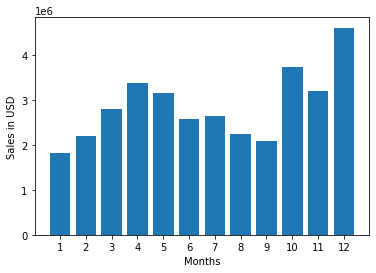

In [ ]:
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

It can be easily seen that December had the highest Sales Value at US$ 4,613,443.5. 

To dive deeper into why December had the highest Sales Value. We can analyze further by the following hypotheses. 
- Holiday season (for example Christmas, New Year, etc.) might affect and have a positive correlation with the highest sales of the year, namely in December.
- Electronics corporations launch new products in Quarter 4 so people tend to spend more in December.

### 3.2: Which city had the best Sales of the year?

Create a new column City. First, we have to get the city name from Purchase Address which is between 2 commas. Then we will split each of its value by comma, and get the values of the city name at index 1.

In [88]:
address_to_city = lambda address:address.split(',')[1]
address_to_city

<function __main__.<lambda>>

After that, we will apply this method to all values of Purchase Address and create a new variable City to contain all new values.

In [89]:
df['City'] = df['Purchase Address'].apply(address_to_city)

In [91]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1,1700.000000,1700.000000,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City
1,295666,LG Washing Machine,1,600.000000,600.000000,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City
2,295667,USB-C Charging Cable,1,11.950000,11.950000,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City
3,295668,27in FHD Monitor,1,149.990005,149.990005,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco
4,295669,USB-C Charging Cable,1,11.950000,11.950000,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta


We will use the previous method of grouping the master data frame by City with each city's total sales value.

In [92]:
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

Find the best sales by City

In [93]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()

8262204.0

Print all unique city names

In [96]:
cities = df['City'].unique()
print(cities)

[' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']


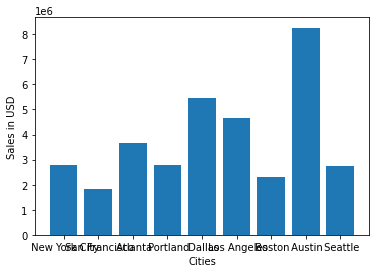

In [97]:
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

At this stage, we can visualize City by Sales. However, we can enhance its format for a better look.

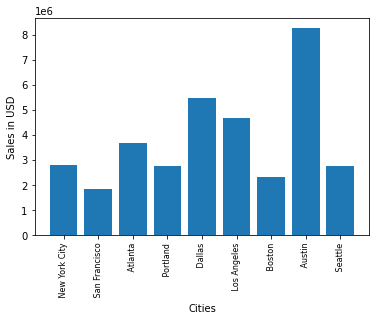

In [98]:
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

To make sure that the order of cities aligns with that of sales_value_city. Let's print them out.

In [99]:
print(cities)
print(sales_value_city)

[' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']
City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32


Their city values do not align with each other. We now have to use the order of sales_value_city to get the correct order. And we will apply list comprehension to cities from sales_value_city.

In [100]:
cities = [city for city, sales in sales_value_city.items()]

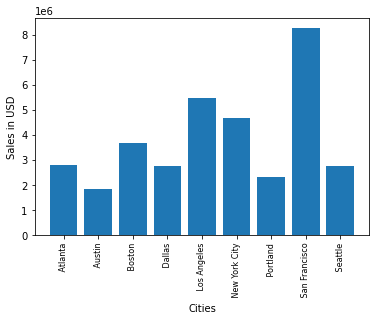

In [101]:
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

It now shows accurately that San Francisco had the highest Sales at US$ 8,262,204.

To dive deeper into why San Franciso has the highest Sales Value. We can analyze further by the following hypotheses. 
- Silicon Valley is based in San Francisco.
- There is a density of engineers in San Franciso with high income. Therefore, they tend to spend more in this city, especially on hi-tech products.

### 3.3: When was the most efficient time to display ads to maximize/optimize the possibility of customers' decisions to buy products?

In [103]:
print(df['Order Date'].dtypes)

object


Convert Order Data into datetime type as this type has many already-built-in functions for faster and more coding efficiency.

In [105]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [106]:
print(df['Order Date'].dtypes)

datetime64[ns]


We just need only the hour values from Order Date and create a new variable Hours to contain these values.

In [108]:
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,295665,Macbook Pro Laptop,1,1700.000000,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,0
1,295666,LG Washing Machine,1,600.000000,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,7
2,295667,USB-C Charging Cable,1,11.950000,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,18
3,295668,27in FHD Monitor,1,149.990005,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,15
4,295669,USB-C Charging Cable,1,11.950000,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,12


We repeat the same method as the previous question.

In [111]:
sales_value_hours = df.groupby('Hours').sum()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]

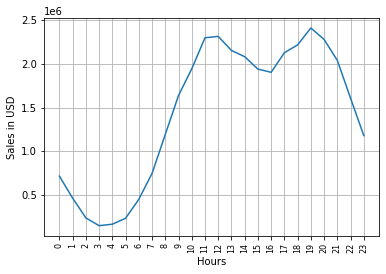

In [112]:
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

We are using Sum for the Sales, which means we can obtain the Total Sales within the hour. It is different from the Total Orders within the hour. Therefore, the Total Orders within the hour have more sense to be used to get an answer since we are trying to find the best hour to optimizing the number of Orders.

So for this chart, we will visualize by using count instead.

In [113]:
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]

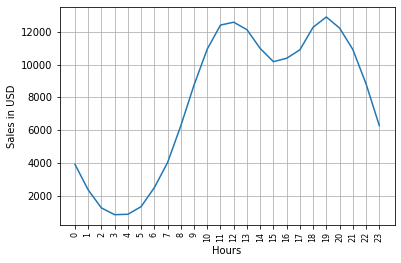

In [114]:
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

After using count, the illustration of the line chart does not change much. But the most important thing here is to understand the question and our data.

The peak of placing Orders was at 11 AM and 12 PM (during lunch break), and at 7 PM, when people got home after work. Therefore, running an ad within 30-60 minutes before these two periods can be recommended to get the most viewers.

In [ ]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

### 3.4: Which products were most sold together?

First, we will find items ordered on the same day, at the same time and/or with the same Order ID to obtain the items of the same Order. Now, we find the duplicated Item.

In [117]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
16,295681,Google Phone,1,600.000000,600.000000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12
17,295681,USB-C Charging Cable,1,11.950000,11.950000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12
18,295681,Bose SoundSport Headphones,1,99.989998,99.989998,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12
19,295681,Wired Headphones,1,11.990000,11.990000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12
36,295698,Vareebadd Phone,1,400.000000,400.000000,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,New York City,14


We group all rows by Order ID and join all rows of Product by ','.

If using pandas apply(), the first parameter must be a function, then we will create a new function by using lambda to get all product values into groupProduct.

In [118]:
groupProduct = lambda product: ', '.join(product)

However, pandas apply() returns a DataFrame while we need a return of Series to input to a new column All Products. Then, we use pandas transform() instead to return/obtain a Series.

In [119]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
16,295681,Google Phone,1,600.000000,600.000000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
17,295681,USB-C Charging Cable,1,11.950000,11.950000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
18,295681,Bose SoundSport Headphones,1,99.989998,99.989998,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
19,295681,Wired Headphones,1,11.990000,11.990000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,Vareebadd Phone,1,400.000000,400.000000,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,New York City,14,"Vareebadd Phone, USB-C Charging Cable"


Since we don't need to use other variables, except Order ID and All Products, we will delete the rest of the unnecessary variables and duplicated rows.

In [121]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup

,Order ID,All Products
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
...,...,...
15147,176484,"iPhone, Wired Headphones"
15150,176486,"Bose SoundSport Headphones, Apple Airpods Head..."
15152,176487,"iPhone, Lightning Charging Cable"
15203,176537,"Apple Airpods Headphones, Apple Airpods Headph..."


Print the top 10 of best-selling products by using value_counts()

In [122]:
df_dup['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

It returns the top-selling products which were sold at the same time within the same order. Then we can identify the best sellers and the other less sold items. Companies can sell their products in a combo to push sales for both best sellers and the less common items. Or they can place promotion on a combo while keeping the regular price of their single purchased product to raise demand for buying a combo rather than a single item.

### 3.5: Which product was sold the most? Why do you think it was the best-selling product?

This is simply handled by grouping the data frame by Product with each product's total Quantity Ordered.

In [124]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
all_products

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

We repeat the same method on prices and products list.

In [126]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

In [128]:
products_ls = [product for product, quant in all_products.items()]
products_ls

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

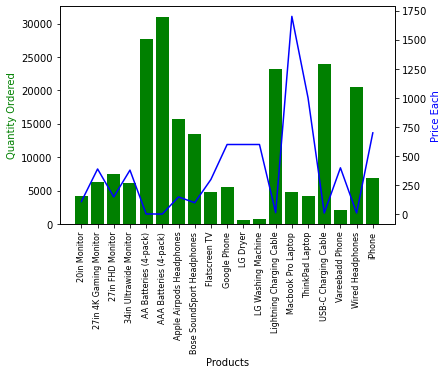

In [129]:
x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

Instead of plotting on bar charts of Products and Quantity Order, we will add a line chart of Price of each product to demonstrate the correlation between Products, Quantity and Price.

Look at the plot, we can see a correlation between the Products' Prices and their Volumes. The AA and AAA Batteries have the highest Volumes Ordered while other pricey products have both low quantities and revenues.

As we do not have other data of other factors or criteria such as brand quality to research and analyze further, so far that is the sum-up of our conclusion.